In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Erupted Volume (Tephra, lava, edifice) (Civico et al., 2022)
tephra_lava_vol_m3=217.4*10**6
tephra_lava_vol_m3_err=6.6*10**6
edifice_vol_m3=36.5*10**6
edifice_vol_m3_err=0.3*10**6
erupted_vol_m3=edifice_vol_m3+tephra_lava_vol_m3

#  Density of erupted material (kg/m3) (Densityx Calcs from this work, Error from Gisbert et al., 2023)
density_erup_kgm3=2700*0.89 # Reducing density based on average of vesicles (11%, from Gisbert et al., 2023)
density_erup_err_kgm3=((2700*0.06)**2 + (50)**2)**0.5 # assuming 6% vesicle error (Gisbert et al., 2023 range 7.4-16.6%) plus DensityX error of 50 kg/m^3 

# Mass of erupted producs
Mass_erup_kg=erupted_vol_m3*density_erup_kgm3

# Volume Fraction to Mass fraction crystal (from Ubide et al., 2023 Table S1 point counting average)
volume_frac_cryst=0.21  
volume_cryst_m3=erupted_vol_m3*volume_frac_cryst
density_cryst_kgm3=3010
mass_cryst_kg=volume_cryst_m3*density_cryst_kgm3
mass_frac_cryst=mass_cryst_kg/Mass_erup_kg
mass_frac_cryst_err=0.3 #Based on range of point-counting data

#Mass of melt 
mass_erup_melt_kg=Mass_erup_kg*(1-mass_frac_cryst)

#CO2 Content (average MI CO2 and matrix glass Average Values all eruption)
CO2_MI_ppm=12040
CO2_Matrix_ppm=11
CO2_degass_ppm=(CO2_MI_ppm-CO2_Matrix_ppm)

#Mass of erupted CO2
Mass_erupted_CO2_Pet_test=CO2_degass_ppm*mass_erup_melt_kg/(10**6)

#in terms of variables for Monte Carlo
Mass_erupted_CO2_Pet=(CO2_MI_ppm-CO2_Matrix_ppm)*((edifice_vol_m3+tephra_lava_vol_m3)*density_erup_kgm3*(1-mass_frac_cryst))/(10**6)

Mass_erupted_CO2_Mt=Mass_erupted_CO2_Pet/10**9
print('Mass Erupted Megatonnes (Mt) of CO2')
Mass_erupted_CO2_Mt

Mass Erupted Megatonnes (Mt) of CO2


5.40861743379

In [3]:
#Dense Rock Equivalent (DRE) of La Palma 2021 with 11% Vesicles 

DRE_km3=(erupted_vol_m3)*(1-0.11)
DRE_km3*10**-9


0.225971

In [4]:
#Dense Rock Equivalent (DRE) Error of La Palma 2021 with 6% Vesicle Error
DRE_km3_error=((tephra_lava_vol_m3_err+edifice_vol_m3_err)*2)+((1-0.06)*2)**0.5
DRE_km3_error*10**-9

0.013800001371130922

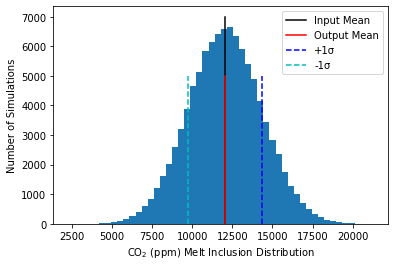

12051.86251251465 14335.286661857592 9768.438363171708 2283.4241493429417


In [5]:
#CO2 in melt inclusion distribution

N_dup=100000 #number of duplicates 

#MI error
CO2_MI_err_ppm=4553


#Normal Distribution of CO2 in Melt Inclusions with Melt Inclusion Error
CO2_MI_MC=np.random.normal(CO2_MI_ppm, CO2_MI_err_ppm/2, N_dup)


#mean CO2 MI MC
CO2_MI_Mean_MC = np.nanmean(CO2_MI_MC)

#standard distribution of values 
CO2_MI_std = np.std(CO2_MI_MC)

#plus and minus 1sigma
CO2_MI_plus_std = CO2_MI_std+CO2_MI_Mean_MC
CO2_MI_minus_std = CO2_MI_Mean_MC-CO2_MI_std
 
plt.hist(CO2_MI_MC, bins=50)
plt.plot([CO2_MI_ppm, CO2_MI_ppm], [0, 7000], '-k', label='Input Mean')
plt.plot([CO2_MI_Mean_MC, CO2_MI_Mean_MC], [0, 5000], '-r', label='Output Mean')
plt.plot([CO2_MI_plus_std, CO2_MI_plus_std], [0, 5000], '--b', label='+1\u03C3')
plt.plot([CO2_MI_minus_std, CO2_MI_minus_std], [0, 5000], '--c', label='-1\u03C3')


plt.legend()
plt.xlabel('CO$_2$ (ppm) Melt Inclusion Distribution')
plt.ylabel('Number of Simulations')

plt.savefig('CO2_MI_dis.pdf')
plt.show()

print(CO2_MI_Mean_MC, CO2_MI_plus_std, CO2_MI_minus_std, CO2_MI_std)

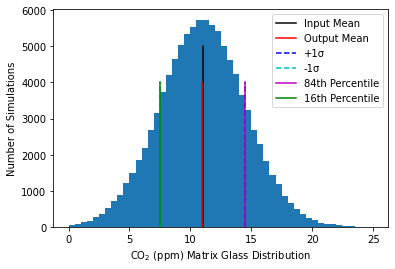

CO2_Matrix_ppm, CO2_Matrix_Mean_MC, CO2_Matrix_std, eightyfourth_sig, sixteenth_sig
11 10.992185498225243 3.4832476252508315 3.4586986496532557 3.4627360189320173


In [6]:
#CO2 matrix glass distribution

N_dup = 100000 #number of duplicates 

#CO2 matrix glass error 
CO2_Matrix_err_ppm = 7

CO2_Matrix_MC= np.array([])

#CO2 matrix glass distribution, 
while len(CO2_Matrix_MC) < N_dup:
    sample = np.random.normal(CO2_Matrix_ppm, CO2_Matrix_err_ppm/2)
    if 0 <= sample <= CO2_Matrix_ppm + 2*CO2_Matrix_err_ppm:
        CO2_Matrix_MC = np.append(CO2_Matrix_MC, sample)
        
        
        

#mean CO2 Matrix MC
CO2_Matrix_Mean_MC = np.nanmean(CO2_Matrix_MC)

#standard distribution of values 
CO2_Matrix_std = np.std(CO2_Matrix_MC)

#plus and minus 1sigma
CO2_Matrix_plus_std = CO2_Matrix_std+CO2_Matrix_Mean_MC
CO2_Matrix_minus_std = CO2_Matrix_Mean_MC-CO2_Matrix_std

#84th and 16th percentile 
eightyfourth_CO2_Matrix_MC = np.percentile(CO2_Matrix_MC, 84)
sixteenth_CO2_Matrix_MC = np.percentile(CO2_Matrix_MC, 16)

#sigma change 84th and 16th percentile 
eightyfourth_sig = eightyfourth_CO2_Matrix_MC-CO2_Matrix_Mean_MC
sixteenth_sig = CO2_Matrix_Mean_MC-sixteenth_CO2_Matrix_MC

#sigma CO2 Matrix Glass distribution
mean_minus_CO2_Matrix_MC = CO2_Matrix_Mean_MC-CO2_Matrix_std
mean_plus_CO2_Matrix_MC = CO2_Matrix_Mean_MC+CO2_Matrix_std



        

plt.hist(CO2_Matrix_MC, bins=50) 

plt.plot([CO2_Matrix_ppm, CO2_Matrix_ppm], [0, 5000], '-k', label='Input Mean')
plt.plot([CO2_Matrix_Mean_MC, CO2_Matrix_Mean_MC], [0, 4000], '-r', label='Output Mean')
plt.plot([mean_plus_CO2_Matrix_MC, mean_plus_CO2_Matrix_MC], [0, 4000], '--b', label='+1\u03C3')
plt.plot([mean_minus_CO2_Matrix_MC, mean_minus_CO2_Matrix_MC], [0, 4000], '--c', label='-1\u03C3')
plt.plot([eightyfourth_CO2_Matrix_MC, eightyfourth_CO2_Matrix_MC], [0, 4000], '-m', label='84th Percentile')
plt.plot([sixteenth_CO2_Matrix_MC, sixteenth_CO2_Matrix_MC], [0, 4000], '-g', label='16th Percentile')


plt.xlabel('CO$_2$ (ppm) Matrix Glass Distribution')
plt.ylabel('Number of Simulations')
plt.legend()
#plt.savefig('CO2_matrix_glass_dis.pdf')
plt.show()


print('CO2_Matrix_ppm, CO2_Matrix_Mean_MC, CO2_Matrix_std, eightyfourth_sig, sixteenth_sig')
print(CO2_Matrix_ppm, CO2_Matrix_Mean_MC, CO2_Matrix_std, eightyfourth_sig, sixteenth_sig)

In [7]:
#creating crystal mass fraction distribution

tephra_lava_vol_m3_MC=np.random.normal(tephra_lava_vol_m3, tephra_lava_vol_m3_err, N_dup)
edifice_vol_m3_MC=np.random.normal(edifice_vol_m3, edifice_vol_m3_err, N_dup)
density_erup_MC=np.random.normal(density_erup_kgm3, density_erup_err_kgm3, N_dup)
mass_frac_cryst_MC = []

while len(mass_frac_cryst_MC) < N_dup:

    sample = np.random.normal(mass_frac_cryst, mass_frac_cryst_err/2)

    if 0 <= sample <= 1:

        mass_frac_cryst_MC.append(sample)
        
mass_frac_cryst_MC = np.array(mass_frac_cryst_MC)


In [8]:
#crystal fraction dist values 

#standard deviation of crystal fraction distribution 
std_dev_cryst = np.std(mass_frac_cryst_MC)

#mean crystal distribution
mean_mass_frac_cryst_MC = np.nanmean(mass_frac_cryst_MC)

#84th and 16th percentile 
eightyfourth_mass_frac_cryst_MC = np.percentile(mass_frac_cryst_MC, 84)
sixteenth_mass_frac_cryst_MC = np.percentile(mass_frac_cryst_MC, 16)
plus_sig_mass_frac_cryst_MC = eightyfourth_mass_frac_cryst_MC-mean_mass_frac_cryst_MC
minus_sig_mass_frac_cryst_MC = mean_mass_frac_cryst_MC-sixteenth_mass_frac_cryst_MC

#1sigma
pos_std_dev_cryst = np.nanmean(mass_frac_cryst_MC) + std_dev_cryst
neg_std_dev_cryst = np.nanmean(mass_frac_cryst_MC) - std_dev_cryst

#print(std_dev_cryst, mean_mass_frac_cryst_MC, pos_std_dev_cryst, neg_std_dev_cryst, plus_sig_mass_frac_cryst_MC, minus_sig_mass_frac_cryst_MC)

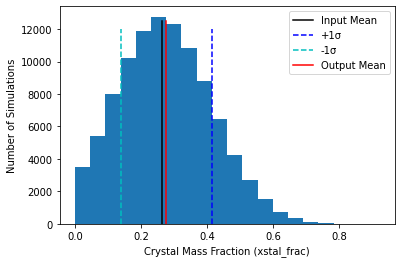

In [9]:
#plotting crystal mass fraction distribution

plt.hist(mass_frac_cryst_MC, bins=20)

plt.plot([mass_frac_cryst, mass_frac_cryst], [0, 12500],'-k', label='Input Mean')
plt.plot([pos_std_dev_cryst, pos_std_dev_cryst], [0, 12000], '--b', label='+1\u03C3')
plt.plot([neg_std_dev_cryst, neg_std_dev_cryst], [0, 12000], '--c', label='-1\u03C3')
plt.plot([np.nanmean(mass_frac_cryst_MC), np.nanmean(mass_frac_cryst_MC)], [0, 12500],'-r', label='Output Mean')


plt.xlabel('Crystal Mass Fraction (xstal_frac)')
plt.ylabel('Number of Simulations')


plt.legend()

In [10]:
#crystal fraction dist values 

#standard deviation of crystal fraction distribution 
std_dev_cryst = np.std(mass_frac_cryst_MC)

#mean crystal distribution
mean_mass_frac_cryst_MC = np.nanmean(mass_frac_cryst_MC)

#84th and 16th percentile 
eightyfourth_mass_frac_cryst_MC = np.percentile(mass_frac_cryst_MC, 84)
sixteenth_mass_frac_cryst_MC = np.percentile(mass_frac_cryst_MC, 16)
plus_sig_mass_frac_cryst_MC = eightyfourth_mass_frac_cryst_MC-mean_mass_frac_cryst_MC
minus_sig_mass_frac_cryst_MC = mean_mass_frac_cryst_MC-sixteenth_mass_frac_cryst_MC

#1sigma
pos_std_dev_cryst = np.nanmean(mass_frac_cryst_MC) + std_dev_cryst
neg_std_dev_cryst = np.nanmean(mass_frac_cryst_MC) - std_dev_cryst

#print(std_dev_cryst, mean_mass_frac_cryst_MC, pos_std_dev_cryst, neg_std_dev_cryst, plus_sig_mass_frac_cryst_MC, minus_sig_mass_frac_cryst_MC)

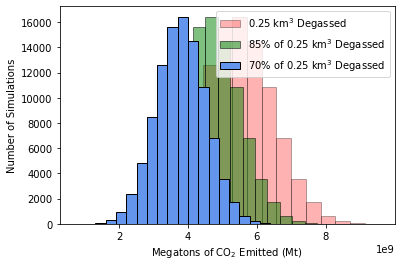

In [11]:
#Figure comparing incomplete degassing

#0.25km^3 fully degassed
Mass_erupted_CO2_Pet_MC=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg))/(10**6)

#0.25km^3 partial degassing 85%
frac_degassing=0.85
Mass_erupted_CO2_Pet_MC_partial_degassing=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg*frac_degassing))/(10**6)

#0.25km^3 partial degassing 70%
frac_degassing_30=0.7
Mass_erupted_CO2_Pet_MC_partial_degassing_30=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg*frac_degassing_30))/(10**6)



plt.hist(Mass_erupted_CO2_Pet_MC, label='0.25 km$^3$ Degassed',ec='k', fc='red', alpha=0.3, bins=20)
plt.hist(Mass_erupted_CO2_Pet_MC_partial_degassing, label='85% of 0.25 km$^3$ Degassed', ec='k', fc='green', alpha=0.5, bins=20)
plt.hist(Mass_erupted_CO2_Pet_MC_partial_degassing_30, label='70% of 0.25 km$^3$ Degassed', ec='k', fc='cornflowerblue', bins=20)


plt.xlabel('Megatons of CO$_2$ Emitted (Mt)')
plt.ylabel('Number of Simulations')

plt.legend()


#plt.savefig("LP_MI_CO2_Emitted_1.16.24.pdf")## ~1km3 fully degassed


In [12]:
#CO2 data output in Mt

mean_full_degassing = np.mean(Mass_erupted_CO2_Pet_MC)/1e9
median_full_degassing = np.median(Mass_erupted_CO2_Pet_MC)/1e9
std_dev_full_degassing = np.std(Mass_erupted_CO2_Pet_MC)/1e9

mean_85_percent_degassed = np.mean(Mass_erupted_CO2_Pet_MC_partial_degassing)/1e9
median_85_percent_degassed = np.median(Mass_erupted_CO2_Pet_MC_partial_degassing)/1e9
std_dev_85_percent_degassed = np.std(Mass_erupted_CO2_Pet_MC_partial_degassing)/1e9

mean_70_percent_degassed = np.mean(Mass_erupted_CO2_Pet_MC_partial_degassing_30)/1e9
median_70_percent_degassed = np.median(Mass_erupted_CO2_Pet_MC_partial_degassing_30)/1e9
std_dev_70_percent_degassed = np.std(Mass_erupted_CO2_Pet_MC_partial_degassing_30)/1e9

#Print
print("Full Degassing - Mean:", mean_full_degassing)
print("Full Degassing - Median:", median_full_degassing)
print("Full Degassing - Standard Deviation:", std_dev_full_degassing)

print("85% Degassed - Mean:", mean_85_percent_degassed)
print("85% Degassed - Median:", median_85_percent_degassed)
print("85% Degassed - Standard Deviation:", std_dev_85_percent_degassed)

print("70% Degassed - Mean:", mean_70_percent_degassed)
print("70% Degassed - Median:", median_70_percent_degassed)
print("70% Degassed - Standard Deviation:", std_dev_70_percent_degassed)

Full Degassing - Mean: 5.41395470685059
Full Degassing - Median: 5.41375303769311
Full Degassing - Standard Deviation: 1.0267038599184768
85% Degassed - Mean: 4.601861500823001
85% Degassed - Median: 4.601690082039144
85% Degassed - Standard Deviation: 0.8726982809307053
70% Degassed - Mean: 3.789768294795412
70% Degassed - Median: 3.7896271263851773
70% Degassed - Standard Deviation: 0.7186927019429338


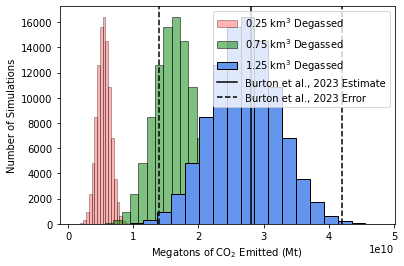

In [13]:
#more degassing than erupted 


#0.25km^3  degassed
Mass_erupted_CO2_Pet_MC=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg))/(10**6)


#0.75km^3 of magma degassed
extra_degassing_2=2
Mass_erupted_CO2_Pet_MC_extra_2=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg*extra_degassing_2))/(10**6)

#0.75km^3 of magma degassed
extra_degassing_3=3
Mass_erupted_CO2_Pet_MC_extra_3=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg*extra_degassing_3))/(10**6)


# 1km^3 of magma degassed
frac_degassing_4=4
Mass_erupted_CO2_Pet_MC_extra_4=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg*frac_degassing_4))/(10**6)


# 1.25 km^3 of magma degassed
frac_degassing_5=5
Mass_erupted_CO2_Pet_MC_extra_5=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg*frac_degassing_5))/(10**6)


# 1.5 km^3 of magma degassed
frac_degassing_6=6
Mass_erupted_CO2_Pet_MC_extra_6=((CO2_MI_MC-CO2_Matrix_MC)*(mass_erup_melt_kg*frac_degassing_6))/(10**6)



#plotting histograms
plt.hist(Mass_erupted_CO2_Pet_MC, label='0.25 km$^3$ Degassed',ec='k', fc='red', alpha=0.3, bins=20)
#plt.hist(Mass_erupted_CO2_Pet_MC_extra_2, label='0.5 km$^3$ Degassed', ec='k', fc='orange', alpha=0.5, bins=20)
plt.hist(Mass_erupted_CO2_Pet_MC_extra_3, label='0.75 km$^3$ Degassed', ec='k', fc='green', alpha=0.5, bins=20)
#plt.hist(Mass_erupted_CO2_Pet_MC_extra_4, label='1 km$^3$ Degassed', ec='k', fc='yellow', bins=20)
plt.hist(Mass_erupted_CO2_Pet_MC_extra_5, label='1.25 km$^3$ Degassed', ec='k', fc='cornflowerblue', zorder=1, bins=20)
#plt.hist(Mass_erupted_CO2_Pet_MC_extra_6, label='1.5 km$^3$ Degassed', ec='k', fc='blue', bins=20)

#Burton et al., 2023 "Exceptional eruptive CO2 emissions" Estimates
burton_co2 = 28*10**9
burton_co2_error = 14*10**9
plt.axvline(burton_co2, color='black', linestyle='-', label='Burton et al., 2023 Estimate')
plt.axvline(burton_co2-burton_co2_error, color='black', linestyle='--', label='Burton et al., 2023 Error')
plt.axvline(burton_co2+burton_co2_error, color='black', linestyle='--',)


plt.xlabel('Megatons of CO$_2$ Emitted (Mt)')
plt.ylabel('Number of Simulations')

plt.legend()


#plt.savefig("LP_MI_CO2_Emitted_1_30_24.pdf")

In [14]:
#CO2 data output in Mt

#0.25km^3 Degassed
mean_full_degassing = np.mean(Mass_erupted_CO2_Pet_MC)/1e9
median_full_degassing = np.median(Mass_erupted_CO2_Pet_MC)/1e9
std_dev_full_degassing = np.std(Mass_erupted_CO2_Pet_MC)/1e9
mean_full_degassing = np.mean(Mass_erupted_CO2_Pet_MC)/1e9

#0.5km^3 Degassed
mean_more_degassed_2 = np.mean(Mass_erupted_CO2_Pet_MC_extra_2)/1e9
median_more_degassed_2 = np.median(Mass_erupted_CO2_Pet_MC_extra_2)/1e9
std_dev_more_degassed_2 = np.std(Mass_erupted_CO2_Pet_MC_extra_2)/1e9

#0.75km^3 Degassed
mean_more_degassed_3 = np.mean(Mass_erupted_CO2_Pet_MC_extra_3)/1e9
median_more_degassed_3 = np.median(Mass_erupted_CO2_Pet_MC_extra_3)/1e9
std_dev_more_degassed_3 = np.std(Mass_erupted_CO2_Pet_MC_extra_3)/1e9

#1.0 km^3 Degassed
mean_more_degassed_4 = np.mean(Mass_erupted_CO2_Pet_MC_extra_4)/1e9
median__more_degassed_4 = np.median(Mass_erupted_CO2_Pet_MC_extra_4)/1e9
std_dev_more_degassed_4 = np.std(Mass_erupted_CO2_Pet_MC_extra_4)/1e9

#1.25km^3 Degassed
mean_more_degassed_5 = np.mean(Mass_erupted_CO2_Pet_MC_extra_5)/1e9
median__more_degassed_5 = np.median(Mass_erupted_CO2_Pet_MC_extra_5)/1e9
std_dev_more_degassed_5 = np.std(Mass_erupted_CO2_Pet_MC_extra_5)/1e9


#Print
print("0.25 km $^3$ Degassed - Mean:", mean_full_degassing)
print("0.25 km $^3$ Degassed - Median:", median_full_degassing)
print("0.25 km $^3$ Degassed - Standard Deviation:", std_dev_full_degassing)
print("  ")
#print("0.5 km $^3$ Degassed - Mean:", mean_more_degassed_2)
#print("0.5 km $^3$ Degassed - Median:", median_more_degassed_2)
#print("0.5 km $^3$ Degassed - Standard Deviation:", std_dev_more_degassed_2)
#print("  ")
print("0.75 km $^3$ Degassed - Mean:", mean_more_degassed_3)
print("0.75 km $^3$ Degassed - Median:", median_more_degassed_3)
print("0.75 km $^3$ Degassed - Standard Deviation:", std_dev_more_degassed_3)
print("  ")
#print("1 km $^3$ Degassed - Mean:", mean_more_degassed_4)
#print("1 km $^3$ Degassed - Median:", median__more_degassed_4)
#print("1 km $^3$ Degassed - Standard Deviation:", std_dev_more_degassed_4)
#print("  ")
print("1.25 km $^3$ Degassed - Mean:", mean_more_degassed_5)
print("1.25 km $^3$ Degassed - Median:", median__more_degassed_5)
print("1.25 km $^3$ Degassed - Standard Deviation:", std_dev_more_degassed_5)


0.25 km $^3$ Degassed - Mean: 5.41395470685059
0.25 km $^3$ Degassed - Median: 5.41375303769311
0.25 km $^3$ Degassed - Standard Deviation: 1.0267038599184768
  
0.75 km $^3$ Degassed - Mean: 16.241864120551767
0.75 km $^3$ Degassed - Median: 16.24125911307933
0.75 km $^3$ Degassed - Standard Deviation: 3.080111579755431
  
1.25 km $^3$ Degassed - Mean: 27.069773534252946
1.25 km $^3$ Degassed - Median: 27.06876518846555
1.25 km $^3$ Degassed - Standard Deviation: 5.133519299592384
